In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings 

warnings.filterwarnings('ignore')

In [6]:
test = pd.read_csv('test.csv')
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [7]:
df = pd.read_csv('train.csv')
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [482]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [483]:
df['City']

0        İstanbul
1          Ankara
2      Diyarbakır
3           Tokat
4       Gaziantep
          ...    
132       Trabzon
133         İzmir
134       Kayseri
135      İstanbul
136      İstanbul
Name: City, Length: 137, dtype: object

In [484]:
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

Text(0, 0.5, 'City')

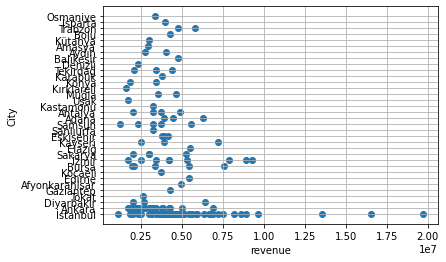

In [485]:
plt.scatter(df['revenue'],df['City'])
plt.grid()
plt.xlabel('revenue')
plt.ylabel('City')

In [486]:
df.groupby('Open Date').describe().T

Open Date      01/03/2014    01/07/2000  01/09/2010  01/17/2009  01/18/2011  \
Id      count         1.0  2.000000e+00         1.0         1.0         1.0   
        mean        119.0  5.050000e+01        66.0        32.0        38.0   
        std           NaN  4.879037e+01         NaN         NaN         NaN   
        min         119.0  1.600000e+01        66.0        32.0        38.0   
        25%         119.0  3.325000e+01        66.0        32.0        38.0   
...                   ...           ...         ...         ...         ...   
revenue min     3780019.0  7.495092e+06   1882131.0   3261924.0   5461700.0   
        25%     3780019.0  1.054555e+07   1882131.0   3261924.0   5461700.0   
        50%     3780019.0  1.359602e+07   1882131.0   3261924.0   5461700.0   
        75%     3780019.0  1.664648e+07   1882131.0   3261924.0   5461700.0   
        max     3780019.0  1.969694e+07   1882131.0   3261924.0   5461700.0   

Open Date      01/22/2007  01/25/2010  01/25/2014  01/26/2009  01/28/1998  \
Id      count         1.0         1.0         1.0         1.0         1.0   
        mean        104.0        79.0        21.0        97.0        28.0   
        std           NaN         NaN         NaN         NaN         NaN   
        min         104.0        79.0        21.0        97.0        28.0   
        25%         104.0        79.0        21.0        97.0        28.0   
...                   ...         ...         ...         ...         ...   
revenue min     4467728.0   6313221.0   1149870.0   6694797.0   4705945.0   
        25%     4467728.0   6313221.0   1149870.0   6694797.0   4705945.0   
        50%     4467728.0   6313221.0   1149870.0   6694797.0   4705945.0   
        75%     4467728.0   6313221.0   1149870.0   6694797.0   4705945.0   
        max     4467728.0   6313221.0   1149870.0   6694797.0   4705945.0   

Open Date      ...  12/16/2005  12/18/1999  12/21/2011  12/21/2013  \
Id      count  ...         1.0         1.0         1.0         1.0   
        mean   ...        81.0        99.0        48.0        65.0   
        std    ...         NaN         NaN         NaN         NaN   
        min    ...        81.0        99.0        48.0        65.0   
        25%    ...        81.0        99.0        48.0        65.0   
...            ...         ...         ...         ...         ...   
revenue min    ...   4066618.0  13575224.0   7201784.0   1756069.0   
        25%    ...   4066618.0  13575224.0   7201784.0   1756069.0   
        50%    ...   4066618.0  13575224.0   7201784.0   1756069.0   
        75%    ...   4066618.0  13575224.0   7201784.0   1756069.0   
        max    ...   4066618.0  13575224.0   7201784.0   1756069.0   

Open Date      12/23/2009  12/23/2011  12/25/2009  12/27/2005  12/29/2011  \
Id      count         1.0         1.0         1.0         1.0         1.0   
        mean         47.0        25.0       118.0       117.0        14.0   
        std           NaN         NaN         NaN         NaN         NaN   
        min          47.0        25.0       118.0       117.0        14.0   
        25%          47.0        25.0       118.0       117.0        14.0   
...                   ...         ...         ...         ...         ...   
revenue min     7865428.0   3778621.0   1847826.0   2018785.0   1999097.0   
        25%     7865428.0   3778621.0   1847826.0   2018785.0   1999097.0   
        50%     7865428.0   3778621.0   1847826.0   2018785.0   1999097.0   
        75%     7865428.0   3778621.0   1847826.0   2018785.0   1999097.0   
        max     7865428.0   3778621.0   1847826.0   2018785.0   1999097.0   

Open Date      12/31/2012  
Id      count         1.0  
        mean         31.0  
        std           NaN  
        min          31.0  
        25%          31.0  
...                   ...  
revenue min     2058644.0  
        25%     2058644.0  
        50%     2058644.0  
        75%     2058644.0  
        max     2058644.0  

[312 rows x 134 columns

In [487]:
df['Type'].str.get_dummies()


,DT,FC,IL
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
132,0,1,0
133,0,1,0
134,0,1,0
135,0,1,0


In [488]:
df['Type'] = pd.get_dummies(df['Type'])


In [489]:
df['Big Cities'] = pd.get_dummies(df['City Group'],drop_first = True)


In [490]:
df['Other'] = pd.get_dummies(df['City Group'],drop_first = True)

In [491]:
df['Open Date'].str.split().str.get(0)

0      07/17/1999
1      02/14/2008
2      03/09/2013
3      02/02/2012
4      05/09/2009
          ...    
132    06/25/2008
133    10/12/2006
134    07/08/2006
135    10/29/2010
136    09/01/2009
Name: Open Date, Length: 137, dtype: object

In [492]:
date = pd.DataFrame(df['Open Date'])
date

,Open Date
0,07/17/1999
1,02/14/2008
2,03/09/2013
3,02/02/2012
4,05/09/2009
...,...
132,06/25/2008
133,10/12/2006
134,07/08/2006
135,10/29/2010


In [493]:
df[['month','date','year']] = date['Open Date'].str.split("/", expand = True)

In [494]:
df['month'] = pd.to_numeric(df['month'])
df['month'].head()

0    7
1    2
2    3
3    2
4    5
Name: month, dtype: int64

In [495]:
df['date'] = pd.to_numeric(df['date'])
df['date'].head()

0    17
1    14
2     9
3     2
4     9
Name: date, dtype: int64

In [496]:
df['year'] = pd.to_numeric(df['year'])
df['year'].head()

0    1999
1    2008
2    2013
3    2012
4    2009
Name: year, dtype: int64

In [497]:
df['Id'].head(5)

0    0
1    1
2    2
3    3
4    4
Name: Id, dtype: int64

In [498]:
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue', 'Big Cities', 'Other', 'month', 'date',
       'year'],
      dtype='object')

In [499]:
#import seaborn as sns
#sns.pairplot(df,kind='reg')

In [525]:
x = df[['Id','Type','Other','Big Cities','year']] 
y = df['revenue']

In [526]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Id          137 non-null    int64
 1   Type        137 non-null    uint8
 2   Other       137 non-null    uint8
 3   Big Cities  137 non-null    uint8
 4   year        137 non-null    int64
dtypes: int64(2), uint8(3)
memory usage: 2.7 KB


In [527]:
y.head()

0    5653753.0
1    6923131.0
2    2055379.0
3    2675511.0
4    4316715.0
Name: revenue, dtype: float64

In [528]:
from sklearn.model_selection import train_test_split

In [529]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [530]:
from sklearn.linear_model import LinearRegression

In [531]:
model = LinearRegression()

In [532]:
model.fit(xtrain, ytrain)

LinearRegression()

In [533]:
model.coef_

array([ 2.78757450e+03,  1.41881173e-09, -5.20957745e+05, -5.20957745e+05,
       -1.02896115e+05])

In [534]:
pd.DataFrame(model.coef_,columns=['coef.'], index=x.columns)

,coef.
Id,2.787575e+03
Type,1.418812e-09
Other,-5.209577e+05
Big Cities,-5.209577e+05
year,-1.028961e+05


In [535]:
print('%.1f%%'%(model.score(xtest,ytest) * 100))

14.8%


In [536]:
ypred = model.predict(xtest)
ypred

array([4568957.40329528, 3683146.08527935, 4913884.21638918,
       4891827.76205516, 3351913.00301674, 5628337.72973856,
       4427279.38709512, 3704958.39794007, 4669554.2270017 ,
       3602306.42475271, 3552130.08373621, 5337107.25718206,
       4460730.28110614, 3752835.44780231, 4777537.2075175 ,
       4763355.19333962, 4744330.45517981, 3543767.36023346,
       4771962.05851567, 4075217.52321553, 5414915.20153445,
       3741441.00812531, 4566413.97046772, 4201729.99419409,
       4435397.96892458, 3985770.99751282, 5820680.3703019 ,
       4239440.27709636, 3296161.5129984 , 4638646.76581824,
       4591013.85762933, 3479653.14671233, 5167309.35429943,
       4694154.11416328, 3649695.19126832])

In [537]:
df['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [538]:
df['City Group'].str.get_dummies()

,Big Cities,Other
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
132,0,1
133,1,0
134,0,1
135,1,0


In [539]:

df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P34,P35,P36,P37,revenue,Big Cities,Other,month,date,year
0,0,07/17/1999,İstanbul,Big Cities,0,4,5.0,4.0,4.0,2,...,5,4,3,4,5653753.0,0,0,7,17,1999
1,1,02/14/2008,Ankara,Big Cities,0,4,5.0,4.0,4.0,1,...,0,0,0,0,6923131.0,0,0,2,14,2008
2,2,03/09/2013,Diyarbakır,Other,0,2,4.0,2.0,5.0,2,...,0,0,0,0,2055379.0,1,1,3,9,2013
3,3,02/02/2012,Tokat,Other,0,6,4.5,6.0,6.0,4,...,18,12,12,6,2675511.0,1,1,2,2,2012
4,4,05/09/2009,Gaziantep,Other,0,3,4.0,3.0,4.0,2,...,3,4,3,3,4316715.0,1,1,5,9,2009


In [540]:

df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P34,P35,P36,P37,revenue,Big Cities,Other,month,date,year
0,0,07/17/1999,İstanbul,Big Cities,0,4,5.0,4.0,4.0,2,...,5,4,3,4,5653753.0,0,0,7,17,1999
1,1,02/14/2008,Ankara,Big Cities,0,4,5.0,4.0,4.0,1,...,0,0,0,0,6923131.0,0,0,2,14,2008
2,2,03/09/2013,Diyarbakır,Other,0,2,4.0,2.0,5.0,2,...,0,0,0,0,2055379.0,1,1,3,9,2013
3,3,02/02/2012,Tokat,Other,0,6,4.5,6.0,6.0,4,...,18,12,12,6,2675511.0,1,1,2,2,2012
4,4,05/09/2009,Gaziantep,Other,0,3,4.0,3.0,4.0,2,...,3,4,3,3,4316715.0,1,1,5,9,2009


In [541]:

df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P34,P35,P36,P37,revenue,Big Cities,Other,month,date,year
0,0,07/17/1999,İstanbul,Big Cities,0,4,5.0,4.0,4.0,2,...,5,4,3,4,5653753.0,0,0,7,17,1999
1,1,02/14/2008,Ankara,Big Cities,0,4,5.0,4.0,4.0,1,...,0,0,0,0,6923131.0,0,0,2,14,2008
2,2,03/09/2013,Diyarbakır,Other,0,2,4.0,2.0,5.0,2,...,0,0,0,0,2055379.0,1,1,3,9,2013
3,3,02/02/2012,Tokat,Other,0,6,4.5,6.0,6.0,4,...,18,12,12,6,2675511.0,1,1,2,2,2012
4,4,05/09/2009,Gaziantep,Other,0,3,4.0,3.0,4.0,2,...,3,4,3,3,4316715.0,1,1,5,9,2009


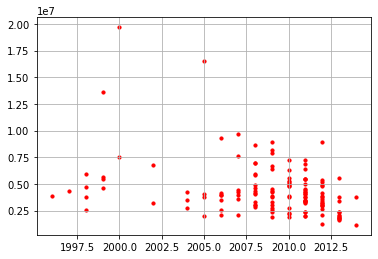

In [542]:
plt.scatter(df[['year']],y,color = 'r',s = 10)
plt.grid()

In [543]:
X = pd.DataFrame(x)

In [544]:
from sklearn.preprocessing import PolynomialFeatures

In [545]:
x_poly2 = PolynomialFeatures(degree=2).fit_transform(X)
x_poly2

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 3.996001e+06],
       [1.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 4.032064e+06],
       [1.000000e+00, 2.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        2.013000e+03, 4.052169e+06],
       ...,
       [1.000000e+00, 1.340000e+02, 0.000000e+00, ..., 1.000000e+00,
        2.006000e+03, 4.024036e+06],
       [1.000000e+00, 1.350000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 4.040100e+06],
       [1.000000e+00, 1.360000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 4.036081e+06]])

In [546]:
x_poly3 = PolynomialFeatures(degree=3).fit_transform(X)
x_poly3

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.98800600e+09],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.09638451e+09],
       [1.00000000e+00, 2.00000000e+00, 0.00000000e+00, ...,
        2.01300000e+03, 4.05216900e+06, 8.15701620e+09],
       ...,
       [1.00000000e+00, 1.34000000e+02, 0.00000000e+00, ...,
        2.00600000e+03, 4.02403600e+06, 8.07221622e+09],
       [1.00000000e+00, 1.35000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.12060100e+09],
       [1.00000000e+00, 1.36000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.10848673e+09]])

In [547]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x_poly2, y, test_size = 0.25, random_state = 101)

In [548]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x_poly3, y, test_size = 0.25, random_state = 101)

In [549]:
model2 = LinearRegression().fit(xtrain2,ytrain2)

In [550]:
model3 = LinearRegression().fit(xtrain3,ytrain3)

In [551]:
model2.score(xtest2,ytest2)

0.21497934441665756

In [552]:
model3.score(xtest3,ytest3)

-0.4027447450435322

In [553]:
model2 = LinearRegression().fit(x_poly,y)
100*model2.score(x_poly,y)

15.420636401372356

In [554]:
model3 = LinearRegression().fit(x_poly,y)
100*model3.score(x_poly,y)

15.420636401372356

In [8]:
df['Open Date'] = pd.to_datetime(df['Open Date'])
test['Open Date'] = pd.to_datetime(test['Open Date'])

In [11]:
df.columns[df.isna().any()].tolist()

[]

In [12]:
test.columns[test.isna().any()].tolist()

[]

In [13]:
import numpy as np

In [20]:
numerical_features = df.select_dtypes([np.number]).columns.tolist()
categorical_features = test.select_dtypes(exclude=[np.number,np.datetime64]).columns.tolist()

In [21]:
numerical_features 

['Id',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

In [22]:
categorical_features

['City', 'City Group', 'Type']

In [24]:
df[categorical_features].head()

,City,City Group,Type
0,İstanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakır,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL


In [25]:
df[numerical_features].head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [27]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [29]:
df[df['revenue'] > 10000000 ].head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,2000-01-07,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
75,75,2005-10-15,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,1999-12-18,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0


In [32]:
df = df[df['revenue'] < 10000000 ]
df.reset_index(drop=True).head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
